Setup Jupyter Notebook kernel for SLO data analysis.<br>

In [1]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions_v2 as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-6-22-19-fixed.csv",
    "csv", False)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


# SLO Twitter Data Analysis  - Tweet @User Mentions Statistics

<span style="font-family:Papyrus; font-size:1.25em;">

Refer to print statements for description of what the statistive provide.<br>

</span>

In [4]:
    print("Percentage of Tweets with User Mentions:")
    print(f"(Number of Tweets with User Mentions divided by Number of Tweets in Dataset)")
    print(tweet_dataframe['tweet_entities_user_mentions_id'].count() / len(tweet_dataframe))

    print("Percentage of Tweets that are Replies to Other Tweets:")
    print(f"(Number of Tweets that are Replies to Another Tweet divided by Number of Tweets in Dataset)")
    print(tweet_dataframe['tweet_in_reply_to_status_id'].count() / len(tweet_dataframe))

Percentage of Tweets with User Mentions:
(Number of Tweets with User Mentions divided by Number of Tweets in Dataset)
1.0
Percentage of Tweets that are Replies to Other Tweets:
(Number of Tweets that are Replies to Another Tweet divided by Number of Tweets in Dataset)
0.058935661803092364


<span style="font-family:Papyrus; font-size:1.25em;">

It seems all Tweets have user mentions.<br>

**TODO: check interpretations of computations are correct.  Might be counting Tweets with empty lists for this field as possessing user mentions**

Very few Tweets are replies to other Tweets.<br>

</span>

<span style="font-family:Papyrus; font-size:1.25em;">

Refer to print statements for description of what the statistics describe.<br>

</span>


User Mentions Count by Percentage of All Tweets for a Given Company:


<Figure size 432x288 with 0 Axes>

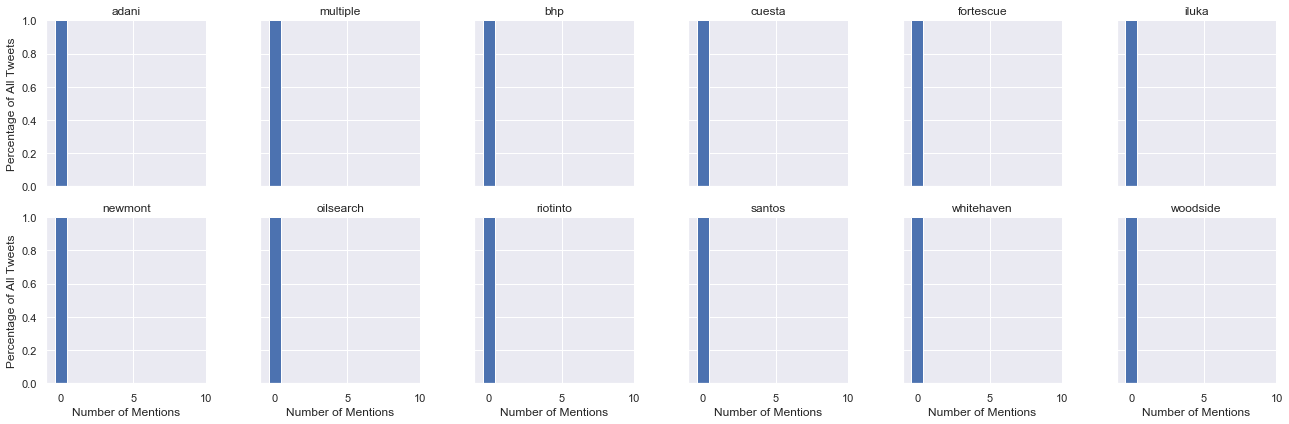

In [5]:
    print(f"\nUser Mentions Count by Percentage of All Tweets for a Given Company:")
    tweet_dataframe['#mentions'] = tweet_dataframe['tweet_entities_user_mentions_id']. \
        apply(lambda x: len(x) if isinstance(x, list) else 0)

    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe[['#mentions', 'company_derived_designation']],
                         col='company_derived_designation', col_wrap=6, ylim=(0, 1), xlim=(-1, 10))
    grid.map_dataframe(tweet_util_v2.bar_plot, '#mentions')
    grid.set_titles('{col_name}')
    grid.set_xlabels("Number of Mentions").set_ylabels("Percentage of All Tweets")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

**TODO: check code for producing these graphs.  The results seem to be odd/incorrect.**<br>

</span>

<span style="font-family:Papyrus; font-size:1.25em;">

Refer to print statements for description of what the statistics describe.<br>

</span>

In [6]:
    print(f"Top (Most) Mentions for a Company by User Mentions ID")
    print(f"Top (highest) Mentions Count for a Given Company by the ID of the User that has been Mentioned")
    print(
        tweet_dataframe[['company_derived_designation', 'tweet_entities_user_mentions_id']].groupby(
            'company_derived_designation').apply(
            lambda x: pd.Series([mention
                                 for mentions in x['tweet_entities_user_mentions_id'] if mentions is not None
                                 for mention in mentions]).value_counts(normalize=False).head()))

Top (Most) Mentions for a Company by User Mentions ID
Top (highest) Mentions Count for a Given Company by the ID of the User that has been Mentioned
company_derived_designation   
adani                        2    801881
                             8    783932
                             1    742077
                             3    740997
                             4    728460
bhp                          [     64347
                             ]     64347
                             2     63635
                             1     56951
                             0     50356
cuesta                       ]       618
                             [       618
                             1       610
                             2       565
                             3       513
fortescue                    7     12451
                             ]     11772
                             [     11772
                             8     11738
                             0     10608


<span style="font-family:Papyrus; font-size:1.25em;">
    
**TODO: the left column seem to be displaying values in a List rather than ID's?**

**FIXME: something wonky is going on.**

</span>